In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import math

In [2]:
data=pd.read_csv('StudentsPerformance.csv')

In [31]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# 1.Males and females participated in the test.

In [4]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

518 females and 482 males participated in the test

# 2. Students' Parental level of Education

In [5]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

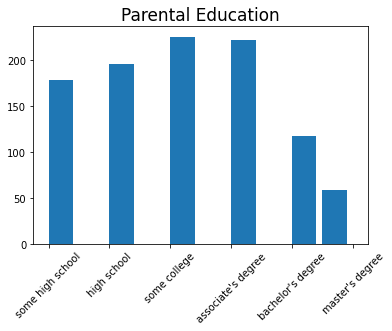

In [6]:
plt.figure()
plt.hist(data['parental level of education'],width=0.4,cumulative=False)
plt.title('Parental Education',fontsize=17)
plt.xticks(rotation=45)
plt.yticks()

All parents are educated,yet only very few parents have Master's degree

# 3. The most on average for math, reading and writing based on
● Gender
● Test preparation course

In [7]:
df=pd.DataFrame(data)

In [8]:
df1=df.mean(axis=0)

/var/folders/nr/y3zhmp352j90t54k00v3k4v40000gp/T/ipykernel_12223/2803276057.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=df.mean(axis=0)


In [9]:
df1

math score       66.001
reading score    69.195
writing score    68.119
dtype: float64

In [10]:
df2=df.loc[(df['math score']>66.001)]

In [11]:
#gender who scored max above average in math
df2['gender'].value_counts().idxmax()

'male'

In [30]:
df2['test preparation course'].value_counts().idxmax()

'none'

In [32]:
df2['test preparation course'].mode()

0    none
Name: test preparation course, dtype: object

In [13]:
df3=df.loc[(df['reading score']>69.001)]

#gender who scored above average in reading
df3['gender'].value_counts().idxmax()

'female'

In [14]:
df3['test preparation course'].value_counts().idxmax()

'none'

In [15]:
df4=df.loc[(df['writing score']>68.119)]
#gender who scored above average in writing score
df4['gender'].value_counts().idxmax()

'female'

In [16]:
#Test preparion Course for gender who scored above average
df3['test preparation course'].value_counts().idxmax()

'none'

In [17]:
mean = data.groupby(["gender","test preparation course"]).mean()
mean

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

Male scored max above average in math score,while Females scored in reading and writing score

The test prepartion course used by most of them is completed but the people who scored above average mostly used none.

# 4.What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course

In [18]:
v1=df['math score'].var()

In [19]:
v1

242.4114104104103

In [20]:
v1=data.groupby(["gender"]).var()
v1

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


Females are having better scoring variation in math,reading and writing score

In [21]:
v1=data.groupby(["test preparation course"]).var()
v1

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


Students with higher variance in test preparation has taken none


# 5.Bonus points to the top 25% of students based on their maths score

In [22]:
df.nlargest(250, ['math score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
